In [8]:
import numpy as np
import pandas as pd

# Loading Dataset

In [9]:
df = pd.read_csv("housing.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Dataset shape

In [10]:
df.shape

(545, 13)

# Checking The NaN Value

In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Dropping The NaN Values

In [12]:
df.dropna(inplace=True)

# DataFrame shape result after 

In [13]:
df.shape

(545, 13)

# Finding the corelation

In [15]:
df.corr(method ='pearson')

C:\Users\BENSON\AppData\Local\Temp\ipykernel_17300\2355739806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


# Creating x and y features

In [16]:
X = df.drop(["price"],axis=True)

In [17]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [18]:
print("Categories in 'mainroad' variable:     ",end=" " )
print(df['mainroad'].unique())

print("Categories in 'guestroom' variable:  ",end=" ")
print(df['guestroom'].unique())

print("Categories in'basement' variable:",end=" " )
print(df['basement'].unique())

print("Categories in 'hotwaterheating' variable:     ",end=" " )
print(df['hotwaterheating'].unique())

print("Categories in 'airconditioning' variable:     ",end=" " )
print(df['airconditioning'].unique())

print("Categories in 'prefarea' variable:     ",end=" " )
print(df['prefarea'].unique())

print("Categories in 'furnishingstatus' variable:     ",end=" " )
print(df['furnishingstatus'].unique())

Categories in 'mainroad' variable:      ['yes' 'no']
Categories in 'guestroom' variable:   ['no' 'yes']
Categories in'basement' variable: ['no' 'yes']
Categories in 'hotwaterheating' variable:      ['no' 'yes']
Categories in 'airconditioning' variable:      ['yes' 'no']
Categories in 'prefarea' variable:      ['yes' 'no']
Categories in 'furnishingstatus' variable:      ['furnished' 'semi-furnished' 'unfurnished']


In [19]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [20]:
X = preprocessor.fit_transform(X)

In [21]:
y = np.array(df.price)
y.shape


(545,)

In [22]:
y = y.reshape(545,1)

# Data Visualization

In [23]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [24]:
columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

In [25]:
import matplotlib.pyplot as plt

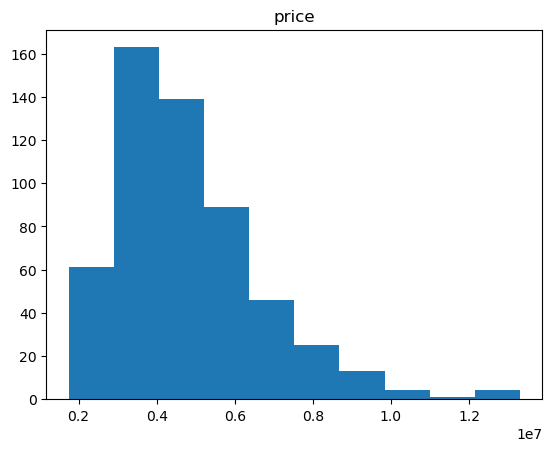

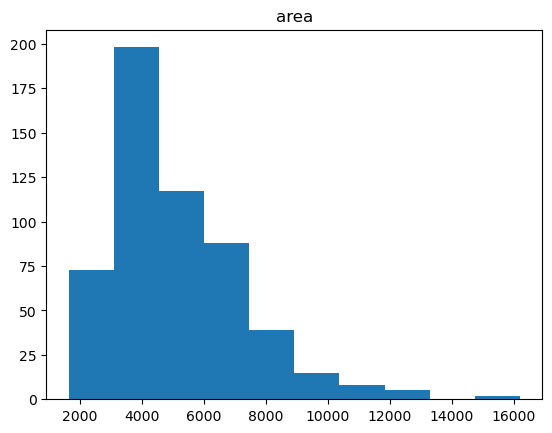

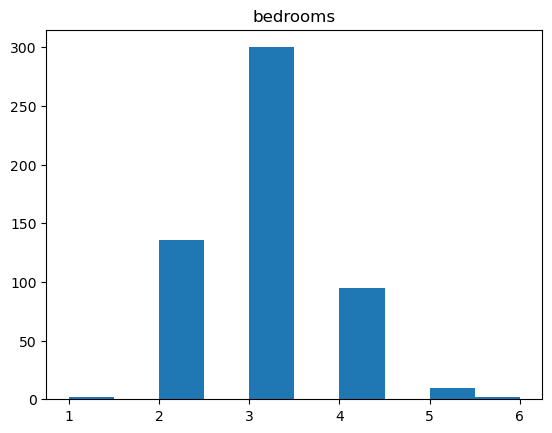

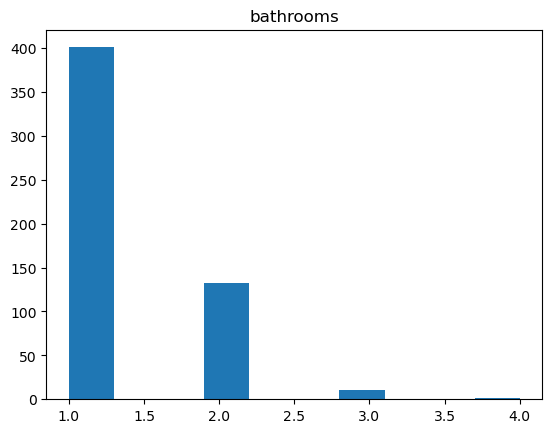

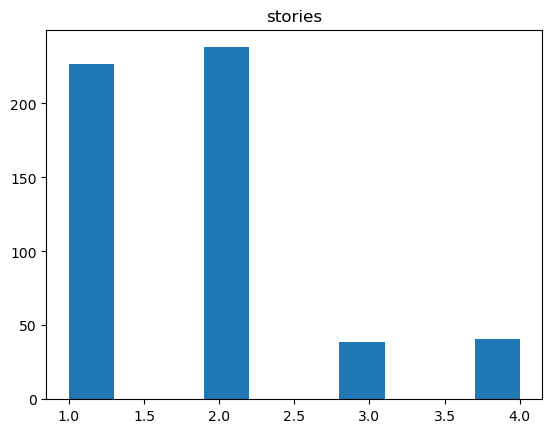

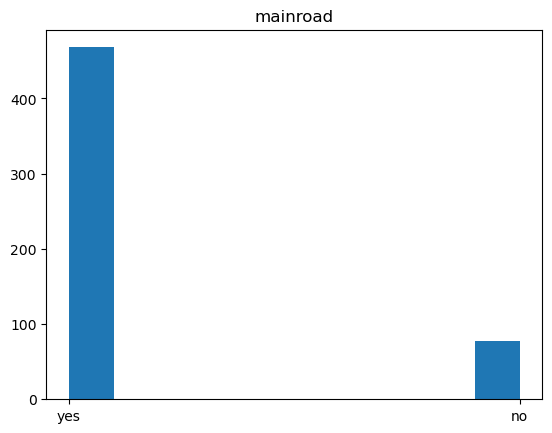

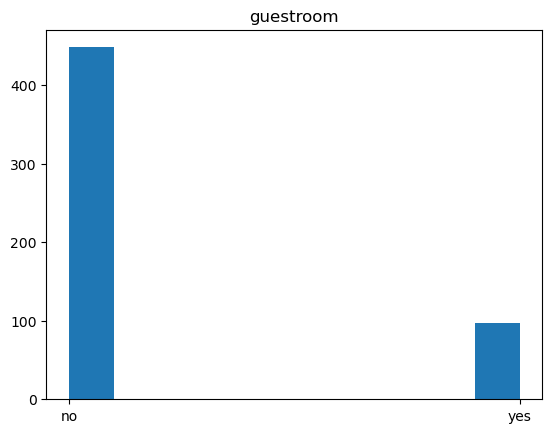

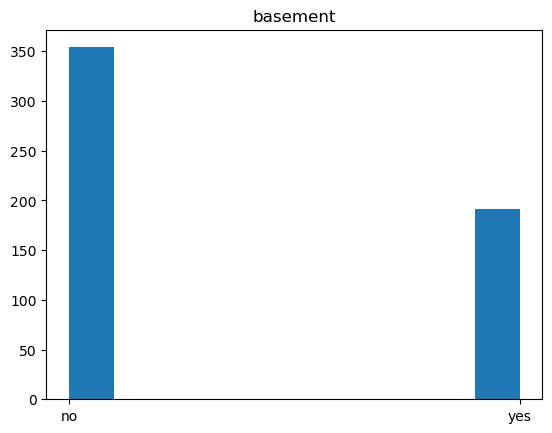

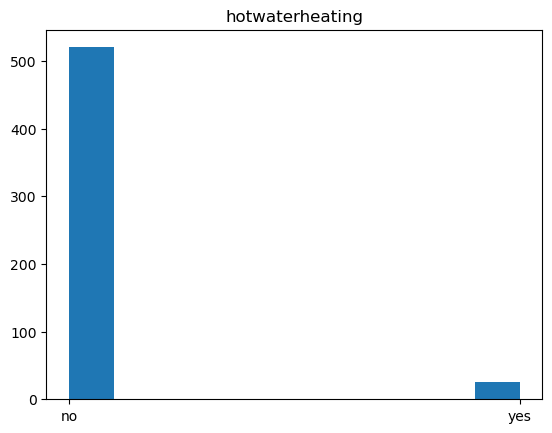

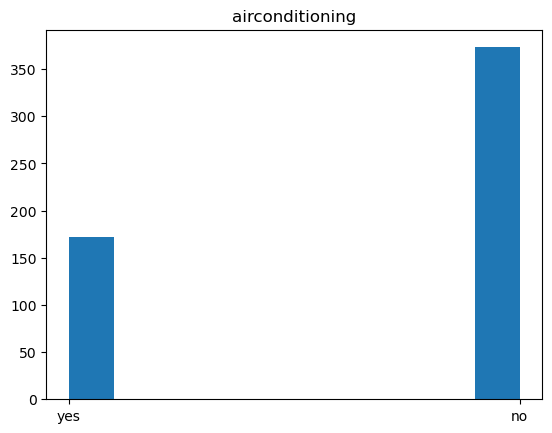

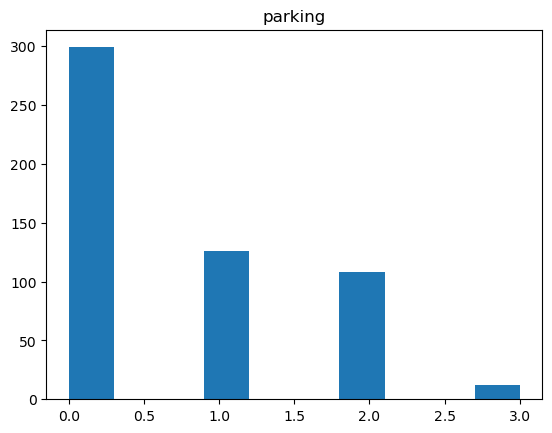

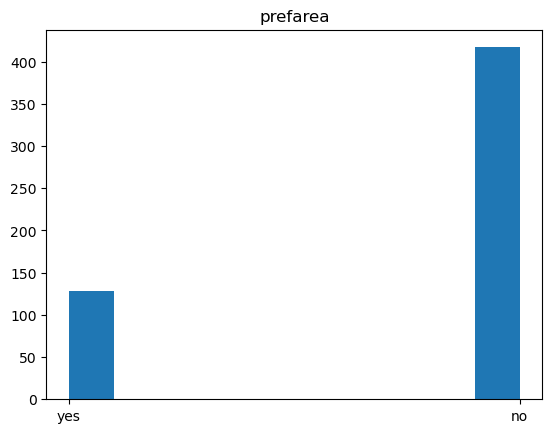

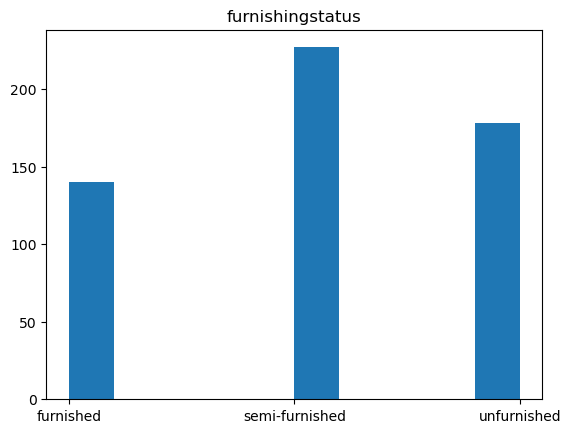

In [26]:
for i in columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

# Finding report

In [27]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [28]:
y.shape

(545, 1)

# Data Splitting

# splitting data into 70:30 ratio

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=30, random_state=0)

# Data Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [33]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)

#view transformed values
print(y_train)

[ 84  58 122  45  60 102 200  54  40  82 199  73 134  38  57 179  99  44
  78 160  78 101  40  67  44 116 156 134  64 105 109 127  54 178  25 128
 195  80  80 109  46 147  75 160  68  99   5 154   0  56  44 113  98  67
  54 145  64 109  55  86  54 151  49  65  69 210  34 202  82  64 132  44
  13 117 160 136  76  34 130   0  22  27  18  94  90  97 122  55  58 204
  28 143  43 108  40  30 166  54 139  54  81  61  73  12  96 206  58  21
   8   7  83 148 151  69 174 190 119 175 148 109  96  73  32 173 132 170
 206 205  64  28  20  66 103 184  39  54 101  86  94   1  34 141 130  40
 171  24  33  25   2  52  80 115 174 122 101 109 128   0 187  59 198  69
  96  10 174 160 191 122 152 123 208  19 119  96  32 207 133  67 109 135
  28 141 194 164 109 196  20  56 201 122  70  24  95 105  27 167  15  96
 141 158  48  63  44  80   6  10 127   6  45  92  88  63  54 175 113 115
 142  32  41 125 146  54 168  17  52 117  14  82  15  41  74 151  60  32
 111 132 132 183  23  72  94  80  34 210 104  16 13

c:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
X_test = sc.fit_transform(X_test)
y_test = sc.fit_transform(y_test)

# Data Visualization

In [35]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Text(0.5, 1.0, 'price')

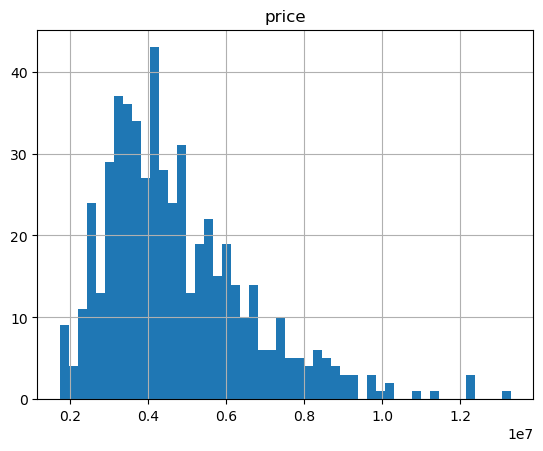

In [36]:
hist_plot = df["price"].hist(bins=50)
hist_plot.set_title('price')

Text(0.5, 1.0, 'area')

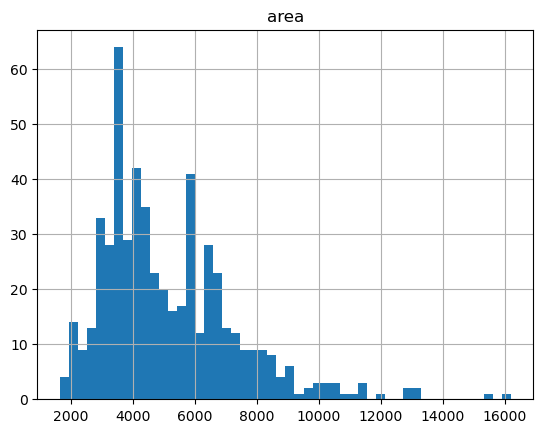

In [37]:
hist_plot = df["area"].hist(bins=50)
hist_plot.set_title('area')

Text(0.5, 1.0, 'bedrooms')

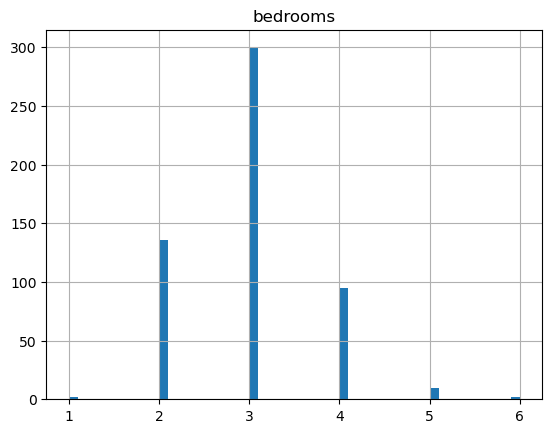

In [38]:
hist_plot = df["bedrooms"].hist(bins=50)
hist_plot.set_title('bedrooms')

Text(0.5, 1.0, 'bathrooms')

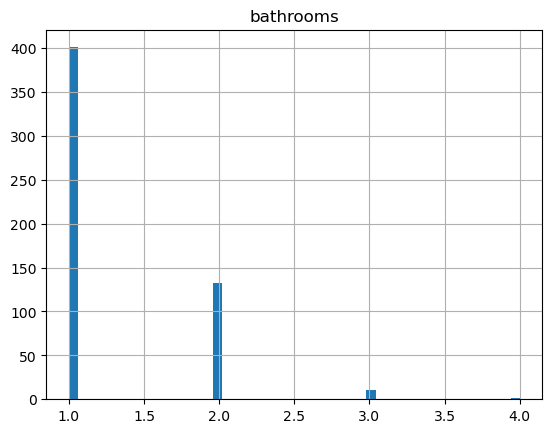

In [39]:
hist_plot = df["bathrooms"].hist(bins=50)
hist_plot.set_title('bathrooms')

Text(0.5, 1.0, 'stories')

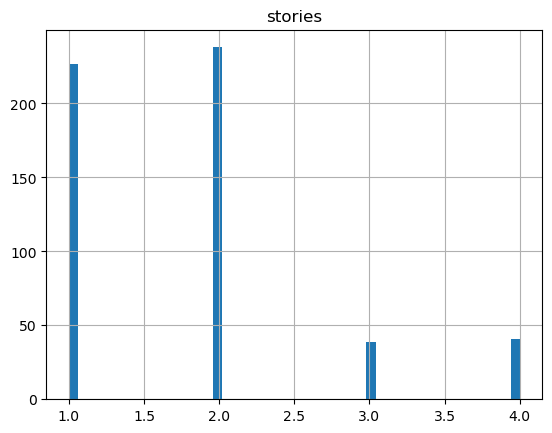

In [40]:
hist_plot = df["stories"].hist(bins=50)
hist_plot.set_title('stories')

Text(0.5, 1.0, 'parking')

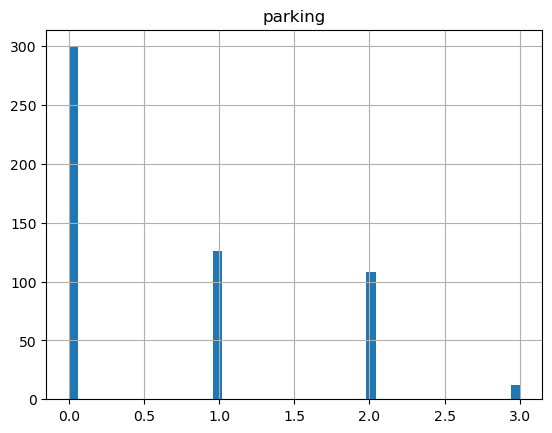

In [41]:
hist_plot = df["parking"].hist(bins=50)
hist_plot.set_title('parking')

# Modelling

#  Logistic Regression classifier 

In [42]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [43]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_preds = model_lr.predict(X_test)

In [45]:
X_test = sc.inverse_transform(X_test)

In [46]:
y_preds = model_lr.predict(X_test)

#  PCA

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X_train)

In [48]:
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [51]:
targetDataframe = df[['price']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)



Text(0, 0.5, 'PC2')

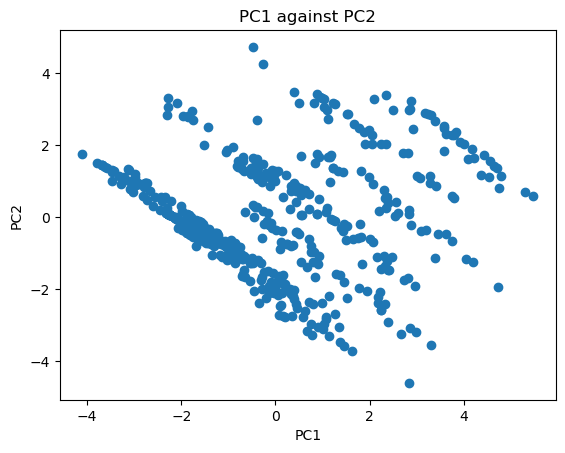

In [52]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [53]:
print(pca.explained_variance_ratio_)

[0.19017145 0.12279893]


In [54]:
print(pca.singular_values_)

[44.25794725 35.56443419]


# Calculate MAPE, RMSE  and R2 for the model and report them in the following table. Hint for RMSE set the squared parameter to False


In [55]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_preds)

523.8663687203032

In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_preds, squared=False)


203.55995003736476

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)



-41435.65325921443

In [59]:
predicted_median_house_values = df["price"]

# Evaluation

# Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis.

In [61]:
actuval_median_house_values = df["price"]


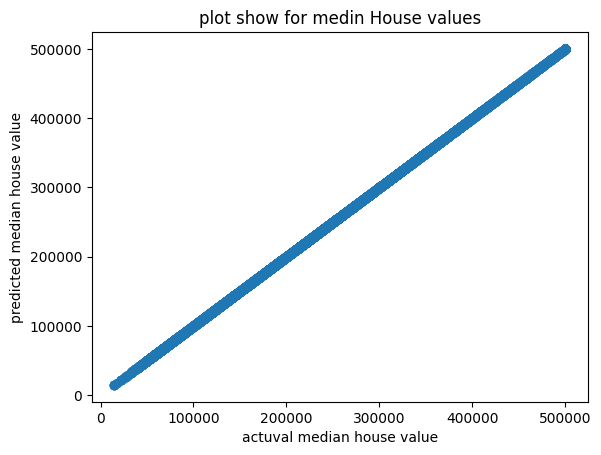

In [ ]:
plt.title('plot show for medin House values')
plt.xlabel("actuval median house value")
plt.ylabel("predicted median house value")
plt.scatter(actuval_median_house_values, predicted_median_house_values)
plt.show()



# Calculate MAPE, RMSE  and R2 for the model and report them in the following table. Hint for RMSE set the squared parameter to False.


In [62]:
print('LinearRegression-MAPE', mean_absolute_percentage_error(y_test, y_preds))
print('LinearRegression-MSE',mean_squared_error(y_test, y_preds, squared=False))
print('LinearRegression-R2',r2_score(y_test, y_preds))

LinearRegression-MAPE 523.8663687203032
LinearRegression-MSE 203.55995003736476
LinearRegression-R2 -41435.65325921443
